In [ ]:
import pandas as pd
data = {
    'user_id': [1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 11, 12, 12, 13, 13, 14, 15, 16, 17, 17, 18, 18, 19, 20, 21, 22, 23, 24],
    'friend_id': [2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 6, 7, 8, 8, 9, 10, 11, 12, 13, 13, 14, 15, 16, 17, 18, 19, 22, 23, 19, 23, 24, 21, 22, 23, 24, 25],
    'age': [25, 28, 24, 30, 22, 26, 29, 31, 27, 23, 33, 28, 29, 26, 24, 30, 32, 29, 26, 28, 25, 27, 31, 29, 22, 24, 23, 30, 26, 28, 25, 27, 31, 29, 22, 33],
    'dob_year': [1997, 1994, 1998, 1992,
2000, 1996, 1993, 1991, 1995, 1999, 1989, 1994, 1993, 1997, 1998, 1992, 1990, 1993, 1996, 1994, 1997, 1995, 1991, 1993, 2000, 1998, 1999, 1992, 1996, 1994, 1997, 1995, 1991, 1993, 2000, 1989]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("pseudo_facebook_extended.csv", index=False)

print("CSV file 'pseudo_facebook_extended.csv' generated successfully.")

CSV file 'pseudo_facebook_extended.csv' generated successfully.


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df=pd.read_csv("pseudo_facebook_extended.csv")
df.head()

,user_id,friend_id,age,dob_year
0,1,2,25,1997
1,1,3,28,1994
2,1,4,24,1998
3,1,5,30,1992
4,2,3,22,2000


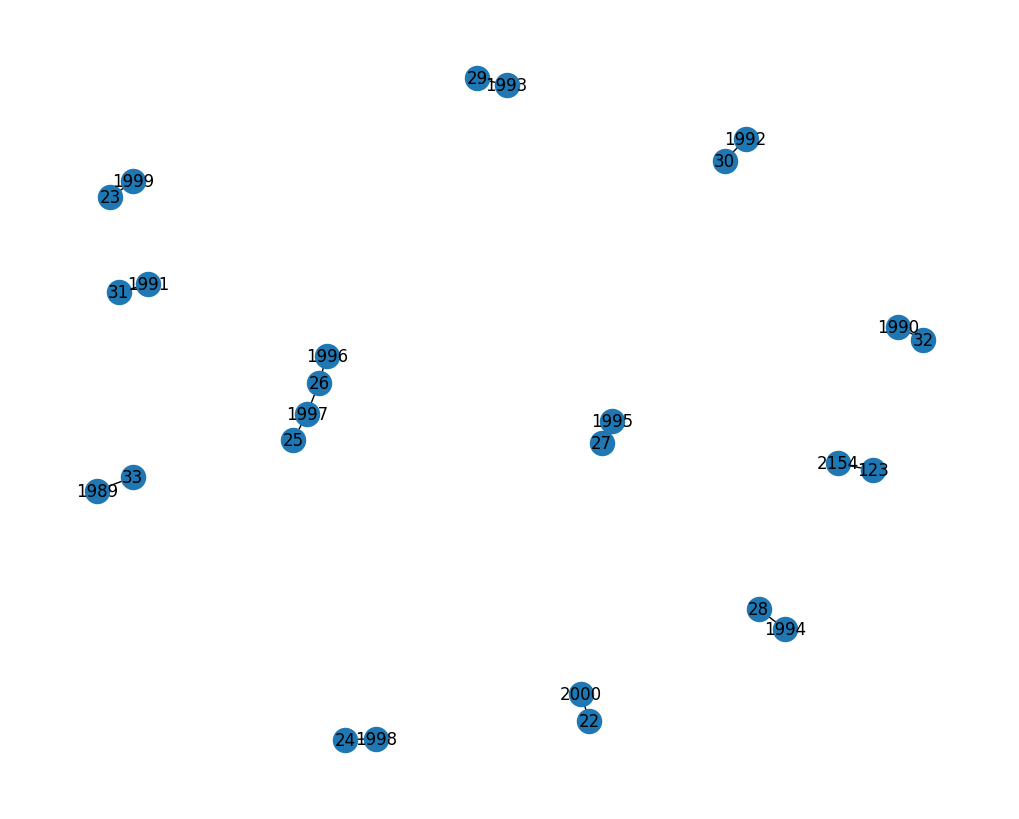

In [ ]:
fb_graph = nx.from_pandas_edgelist(df, source="age", target="dob_year")
fb_graph.add_edge("123", "2154")
fb_graph.nodes()
fb_graph.edges()
plt.figure(figsize=(10,8))
nx.draw(fb_graph, with_labels=True)
plt.show()

In [ ]:
print("Degree:", nx.degree(fb_graph))
print("Degree centrality:", nx.degree_centrality(fb_graph))

Degree: [(25, 1), (1997, 2), (28, 1), (1994, 1), (24, 1), (1998, 1), (30, 1), (1992, 1), (22, 1), (2000, 1), (26, 2), (1996, 1), (29, 1), (1993, 1), (31, 1), (1991, 1), (27, 1), (1995, 1), (23, 1), (1999, 1), (33, 1), (1989, 1), (32, 1), (1990, 1), ('123', 1), ('2154', 1)]
Degree centrality: {25: 0.04, 1997: 0.08, 28: 0.04, 1994: 0.04, 24: 0.04, 1998: 0.04, 30: 0.04, 1992: 0.04, 22: 0.04, 2000: 0.04, 26: 0.08, 1996: 0.04, 29: 0.04, 1993: 0.04, 31: 0.04, 1991: 0.04, 27: 0.04, 1995: 0.04, 23: 0.04, 1999: 0.04, 33: 0.04, 1989: 0.04, 32: 0.04, 1990: 0.04, '123': 0.04, '2154': 0.04}


In [ ]:
m_influential=nx.degree_centrality(fb_graph)
print("Most Influential Node:")
for w in sorted(m_influential, key=m_influential.get, reverse=True):
  print(w, m_influential[w])

Most Influential Node:
1997 0.08
26 0.08
25 0.04
28 0.04
1994 0.04
24 0.04
1998 0.04
30 0.04
1992 0.04
22 0.04
2000 0.04
1996 0.04
29 0.04
1993 0.04
31 0.04
1991 0.04
27 0.04
1995 0.04
23 0.04
1999 0.04
33 0.04
1989 0.04
32 0.04
1990 0.04
123 0.04
2154 0.04


In [ ]:
closeness_centrality=nx.closeness_centrality(fb_graph)
print("Closeness centrality:")
print(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:8])

Closeness centrality:
[(1997, 0.09), (26, 0.09), (25, 0.06), (1996, 0.06), (28, 0.04), (1994, 0.04), (24, 0.04), (1998, 0.04)]


(-1.130440252143306,
 1.1482134962388835,
 -1.1156363404889946,
 1.2010333174220311)

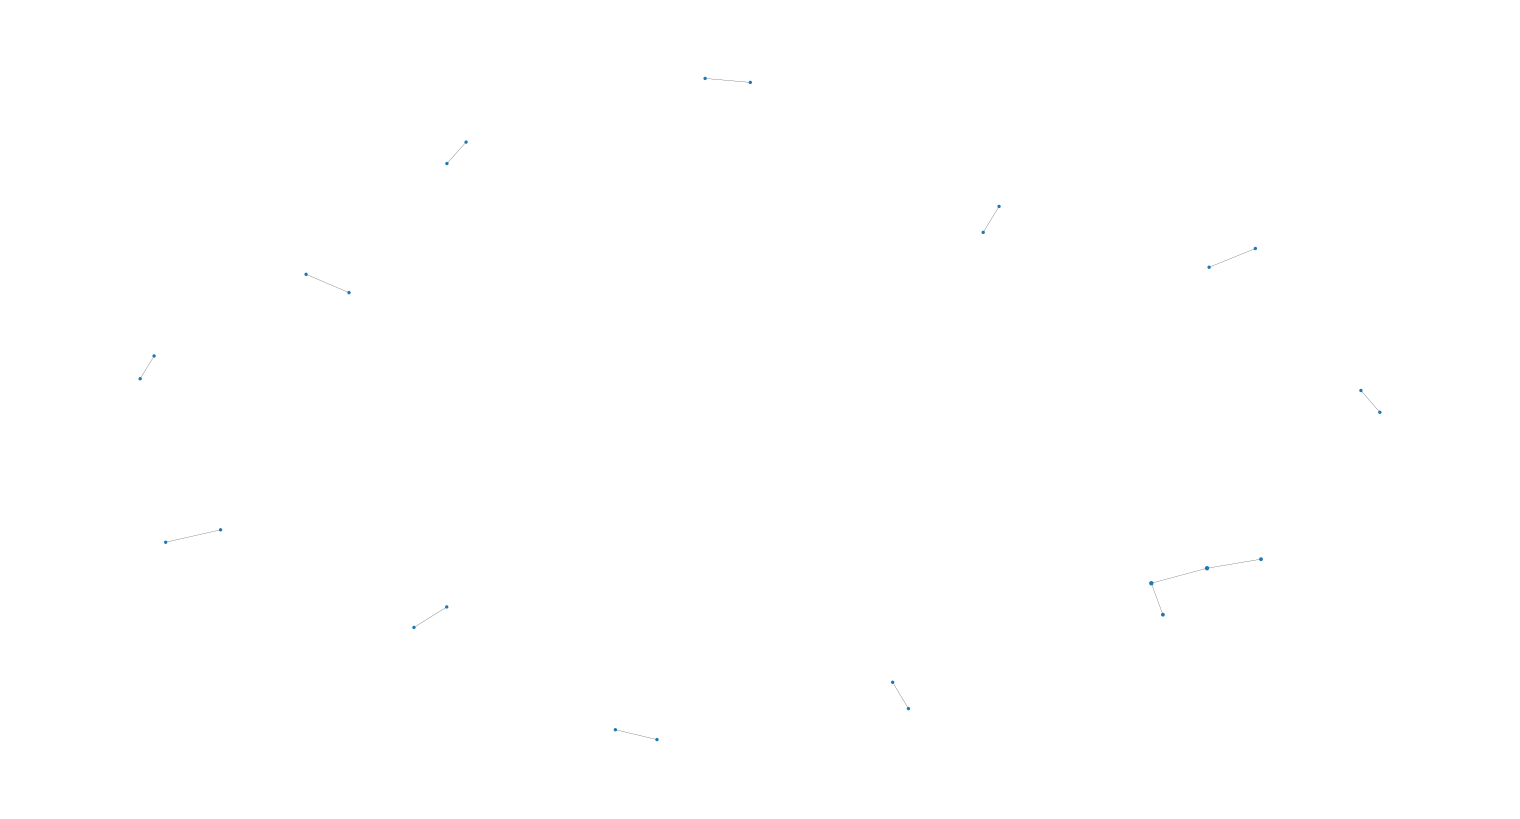

In [ ]:
node_size=[v*50 for v in closeness_centrality.values()]
plt.figure(figsize=(15,8))
nx.draw(fb_graph, pos=nx.spring_layout(fb_graph), node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [ ]:
bridges=list(nx.bridges(fb_graph))
print("Number of bridges:", len(bridges))

Number of bridges: 14


(-1.1762194431489112,
 1.1707177283853953,
 -1.0948968054134052,
 1.1990625923695997)

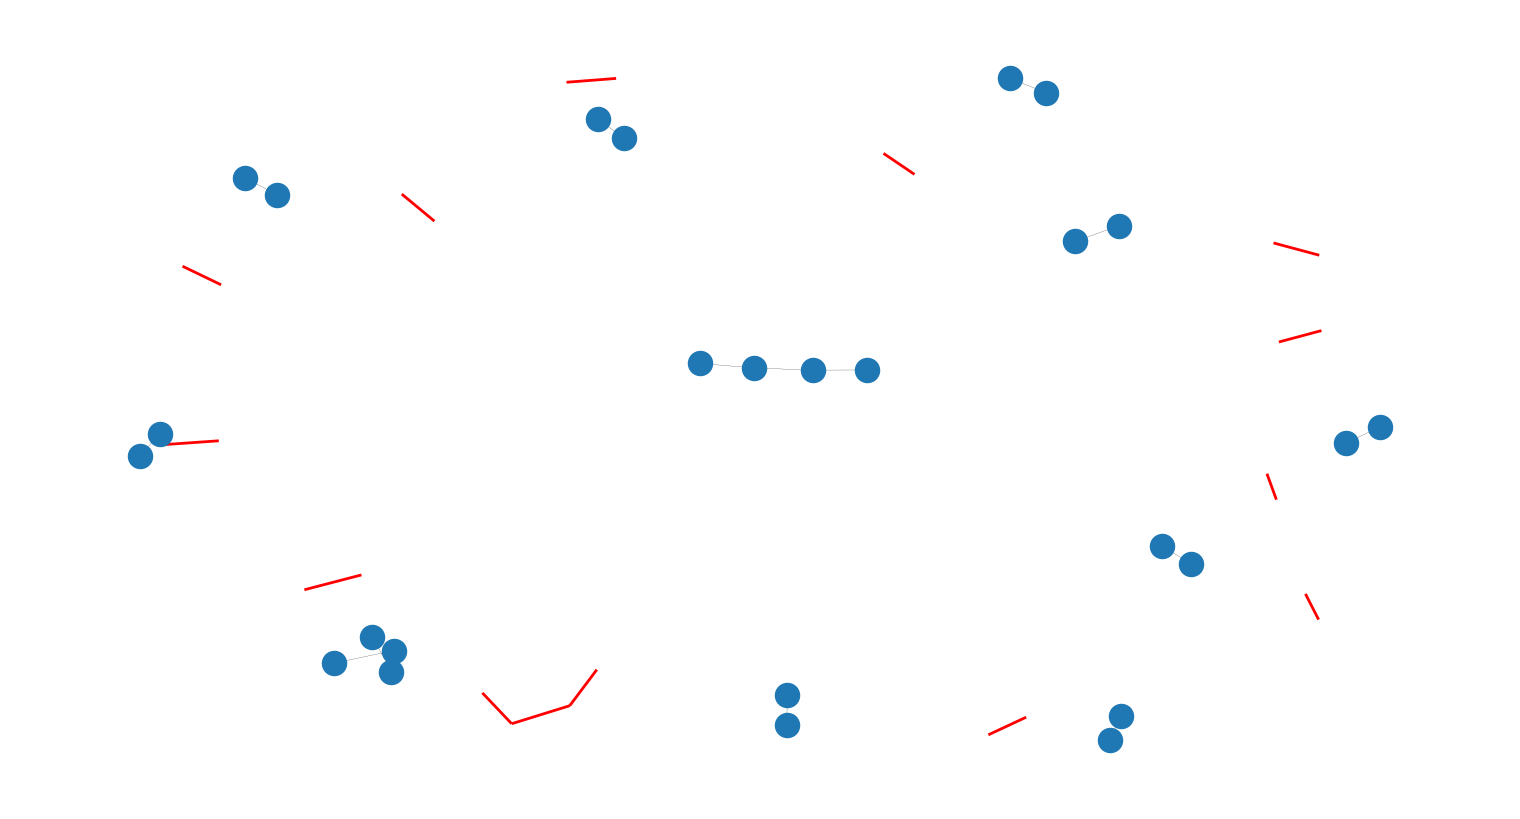

In [ ]:
plt.figure(figsize=(15,8))
nx.draw(fb_graph, pos=nx.spring_layout(fb_graph), with_labels=False, width=0.15)
nx.draw_networkx_edges(fb_graph, pos=nx.spring_layout(fb_graph), edgelist=bridges, width=2, edge_color="red")
plt.axis("off")

In [ ]:
print("Average Clustering Coefficient:", nx.average_clustering(fb_graph))


Average Clustering Coefficient: 0.0


In [ ]:
plt.show()